# Predicting Ad click using Logistic Regression

##### Explore the data to predict who is more likely to click the ad! using Logistic Regression based on the features of the user

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore",category = FutureWarning)

In [3]:
Ad = pd.read_csv(r"C:\Users\Shivani Dussa\Downloads\advertisings.csv")

Dataset:
- Data set contains the following attributes:
- Daily Time Spent on Site  - Customer time on site in minutes
- Age                       - Customer age in years
- Area Income               - Avg. income of Geographical area of cosumer
- Daily Internet Usage      -  Avg min. of  customers use data in a day 
- Ad Topic Line             - Headline of the  Advertisement 
- City                      - City of consumer
- Male                      - whether the consumer is Male or not (0 is male and 1 is not male i.e., female)
- Country                   - Consumer of country
- Timestamp                 - Time at which consumer clicked on Ad or closed the window
- Clicked on Ad             - 0 indicate that clicking on Ad and 1 is not clicking on the ad

In [4]:
Ad.head(3)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0


In [5]:
Ad.shape

(1000, 10)

##### Exploring the Data

In [9]:
Ad.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked on Ad'],
      dtype='object')

In [11]:
Ad.isnull().sum()   # to check null values

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Male                        0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64

In [12]:
Ad.info()        # to check null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [15]:
Ad.describe().transpose()   

,count,mean,std,min,25%,50%,75%,max
Daily Time Spent on Site,1000.0,65.00020,15.853615,32.60,51.3600,68.215,78.5475,91.43
Age,1000.0,36.00900,8.785562,19.00,29.0000,35.000,42.0000,61.00
Area Income,1000.0,55000.00008,13414.634022,13996.50,47031.8025,57012.300,65470.6350,79484.80
Daily Internet Usage,1000.0,180.00010,43.902339,104.78,138.8300,183.130,218.7925,269.96
Male,1000.0,0.48100,0.499889,0.00,0.0000,0.000,1.0000,1.00
Clicked on Ad,1000.0,0.50000,0.500250,0.00,0.0000,0.500,1.0000,1.00


In [18]:
Ad.duplicated().sum()   # to check duplicate values

0

In [27]:
Ad.dtypes

Daily Time Spent on Site    float64
Age                           int64
Area Income                 float64
Daily Internet Usage        float64
Ad Topic Line                object
City                         object
Male                          int64
Country                      object
Timestamp                    object
Clicked on Ad                 int64
dtype: object

In [31]:
Ad['Clicked on Ad'].unique()

array([0, 1], dtype=int64)

<AxesSubplot:xlabel='Age', ylabel='Density'>

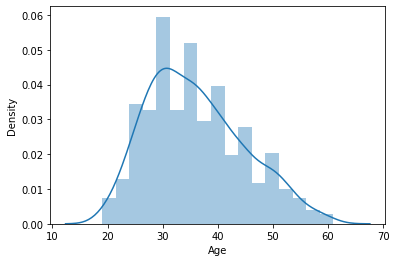

In [39]:
sns.distplot(Ad.Age)

###### Most people between 25 to 45 age people are most used internet 

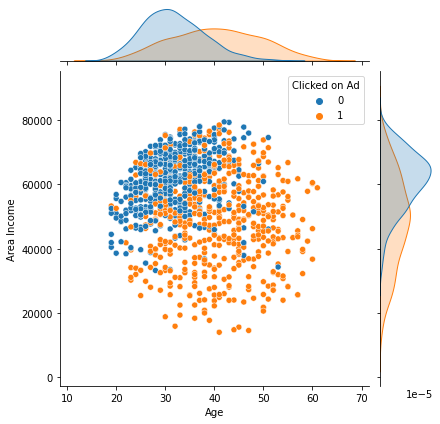

In [61]:
sns.jointplot(x = Ad['Age'], y = Ad['Area Income'], hue =  Ad['Clicked on Ad'])

##### Obsevation : people who are in between 20 - 40 age , income with 40K - 80K they are clicked on Ad(0, blue indicated 0 ) rest of all very less or not clicked on Ad

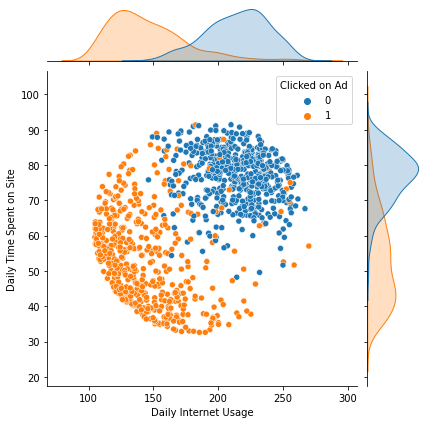

In [63]:
sns.jointplot(x = Ad['Daily Internet Usage'], y = Ad['Daily Time Spent on Site'], hue =  Ad['Clicked on Ad'])

In [8]:
Ad.head(2)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0


## Splitting the data

In [36]:
X = Ad[['Daily Time Spent on Site', 'Age', 'Area Income','Daily Internet Usage',  'Male']]
y = Ad['Clicked on Ad']

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [39]:
X_train.shape,y_train.shape

((700, 5), (700,))

In [40]:
X_test.shape,y_test.shape

((300, 5), (300,))

## Logistic Regression

In [41]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [43]:
pred = model.predict(X_test)

In [46]:
model.score(X_test,y_test)

0.8966666666666666

In [55]:
from sklearn.metrics import accuracy_score
scr = accuracy_score(y_test,pred)
print("ACCURACY SCORE:",scr)

ACCURACY SCORE: 0.8966666666666666


(You can use both methods to get accuracy)

Observations:

Accuracy comes out to 0.89, or 89% (89 correct predictions out of 100 total examples)

## Predictions and Evaluations

In [57]:
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90       146
           1       0.96      0.84      0.89       154

    accuracy                           0.90       300
   macro avg       0.90      0.90      0.90       300
weighted avg       0.90      0.90      0.90       300



In [58]:
confusion_matrix(y_test,pred)

array([[140,   6],
       [ 25, 129]], dtype=int64)

### **Observations:**

- ## Confusion Matrix:

  - Each row: Actual Class

  - Each column: Predicted Class

  - First: Non-clicked Ads, the negative class:

 ### **181 were correctly classified as Non-clicked Ads. True negatives.**
 ###  **Remaining 32 were wrongly classified as clicked Ads. False positive**
 ### **Second: The clicked Ads, the positive class:**

   - 10 were incorrectly classified as Non-clicked Ads. False negatives
   - 177 were correctly classified clicked Ads. True positives